# **Initial Model Evaluation**

In [ ]:
model_w2v = MLP(input_dim=768, num_classes=num_classes).to(device)

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
import numpy as np

class_counts = np.bincount(y_train_w2v)
class_weights = 1.0 / (class_counts + 1e-6)
class_weights = class_weights / class_weights.sum()

weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=weights)

optimizer = optim.Adam(model_w2v.parameters(), lr=1e-3)

EPOCHS = 10

for epoch in range(EPOCHS):

    model_w2v.train()
    train_preds, train_labels = [], []

    for x, y in tqdm(train_loader_w2v):
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()

        outputs = model_w2v(x)
        loss = criterion(outputs, y)

        loss.backward()
        optimizer.step()

        train_preds.extend(outputs.argmax(1).cpu().numpy())
        train_labels.extend(y.cpu().numpy())

    train_acc = accuracy_score(train_labels, train_preds)

    model_w2v.eval()
    val_preds, val_labels = [], []

    with torch.no_grad():
        for x, y in val_loader_w2v:
            x, y = x.to(device), y.to(device)

            outputs = model_w2v(x)

            val_preds.extend(outputs.argmax(1).cpu().numpy())
            val_labels.extend(y.cpu().numpy())

    val_acc = accuracy_score(val_labels, val_preds)
    val_f1 = f1_score(val_labels, val_preds, average="macro")

    print(f"Epoch {epoch+1}: "
          f"Train Acc={train_acc:.4f}, "
          f"Val Acc={val_acc:.4f}, "
          f"Val F1={val_f1:.4f}")

100%|██████████| 702/702 [00:05<00:00, 129.43it/s]


Epoch 1: Train Acc=0.5521, Val Acc=0.2979, Val F1=0.1468


100%|██████████| 702/702 [00:02<00:00, 248.10it/s]


Epoch 2: Train Acc=0.7156, Val Acc=0.2977, Val F1=0.1716


100%|██████████| 702/702 [00:03<00:00, 188.49it/s]


Epoch 3: Train Acc=0.7652, Val Acc=0.2560, Val F1=0.1761


100%|██████████| 702/702 [00:04<00:00, 157.67it/s]


Epoch 4: Train Acc=0.7996, Val Acc=0.2739, Val F1=0.1711


100%|██████████| 702/702 [00:02<00:00, 247.38it/s]


Epoch 5: Train Acc=0.8239, Val Acc=0.3553, Val F1=0.1990


100%|██████████| 702/702 [00:01<00:00, 389.07it/s]


Epoch 6: Train Acc=0.8437, Val Acc=0.4075, Val F1=0.2470


100%|██████████| 702/702 [00:02<00:00, 349.19it/s]


Epoch 7: Train Acc=0.8559, Val Acc=0.3981, Val F1=0.2288


100%|██████████| 702/702 [00:01<00:00, 408.30it/s]


Epoch 8: Train Acc=0.8696, Val Acc=0.3833, Val F1=0.2202


100%|██████████| 702/702 [00:01<00:00, 408.05it/s]


Epoch 9: Train Acc=0.8777, Val Acc=0.3379, Val F1=0.2126


100%|██████████| 702/702 [00:01<00:00, 413.27it/s]


Epoch 10: Train Acc=0.8881, Val Acc=0.3655, Val F1=0.2321


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

model_w2v.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for x, y in val_loader_w2v:
        x = x.to(device)

        outputs = model_w2v(x)
        preds = outputs.argmax(1).cpu().numpy()

        all_preds.extend(preds)
        all_labels.extend(y.numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

val_acc = accuracy_score(all_labels, all_preds)
val_f1 = f1_score(all_labels, all_preds, average="macro")

print("Validation Accuracy:", val_acc)
print("Validation Macro F1:", val_f1)

Validation Accuracy: 0.3655483224837256
Validation Macro F1: 0.23210408252899578


In [ ]:
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

    eighties       0.00      0.00      0.00        10
     fifties       0.18      0.19      0.19       822
    fourties       0.45      0.29      0.35      1911
   seventies       0.11      0.07      0.09       363
     sixties       0.10      0.19      0.13       120
       teens       0.17      0.27      0.21       402
    thirties       0.36      0.41      0.38      1980
    twenties       0.49      0.52      0.50      2380

    accuracy                           0.37      7988
   macro avg       0.23      0.24      0.23      7988
weighted avg       0.38      0.37      0.37      7988



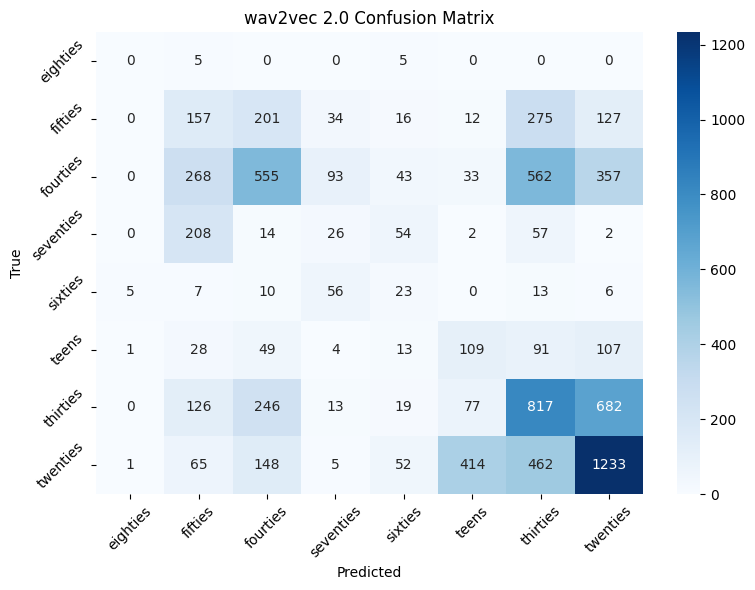

In [ ]:
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("wav2vec 2.0 Confusion Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()